In [50]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
# from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [51]:
# importing data
filepath = './^GSPC (2).csv'
df = pd.read_csv(filepath, parse_dates = True,index_col=0)

In [94]:
# checking data
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-26,3139.899902,3182.510010,3108.989990,3116.389893,3116.389893,5478110000
2020-02-27,3062.540039,3097.070068,2977.389893,2978.760010,2978.760010,7058840000
2020-02-28,2916.899902,2959.719971,2855.840088,2954.219971,2954.219971,8563850000
2020-03-02,2974.280029,3090.959961,2945.189941,3090.229980,3090.229980,6376400000
2020-03-03,3096.459961,3136.719971,2976.629883,3003.370117,3003.370117,6355940000


In [53]:
# Statistical Summary
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2.558000e+03
mean,1983.609980,1992.948135,1973.472393,1984.022168,1984.022168,3.722317e+09
std,607.478874,608.845913,605.783267,607.269728,607.269728,8.207895e+08
min,1027.650024,1032.949951,1010.909973,1022.580017,1022.580017,1.025000e+09
25%,1391.157532,1399.240051,1385.670044,1391.872467,1391.872467,3.243470e+09
50%,1995.719970,2005.059998,1985.860046,1995.500000,1995.500000,3.596145e+09
75%,2465.372437,2472.397522,2458.689941,2465.765076,2465.765076,4.075870e+09
max,3380.449951,3393.520020,3378.830078,3386.149902,3386.149902,1.061781e+10


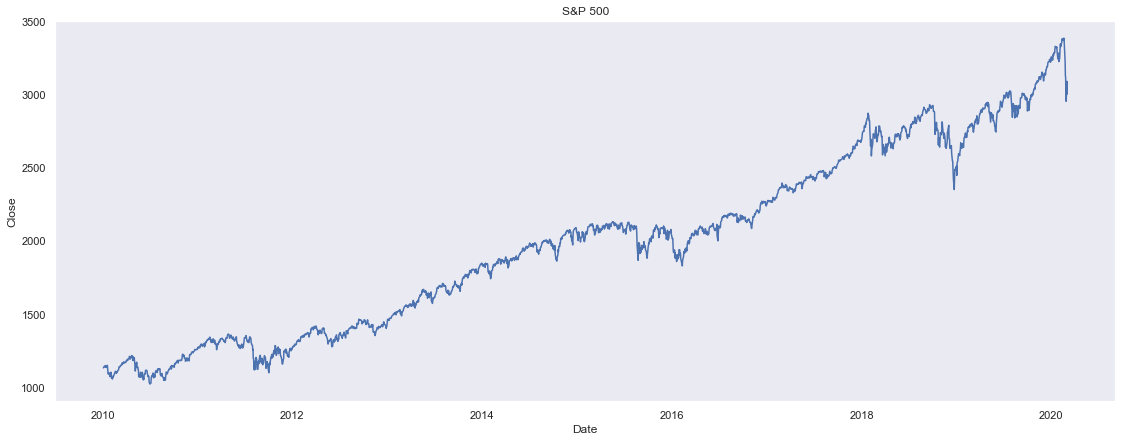

In [124]:
# time series
sns.set(style = 'dark')
plt.figure(figsize = [19, 7])
# plt.plot(df.Open)
plt.plot(df.Close)
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('S&P 500')
plt.show()

In [55]:
# separating independent variables from dependent variable
df_features = df.drop(['Close', 'Adj Close', 'Volume'], axis=1)
X = df_features.values
y = df['Close'].values

In [56]:
X_train = X[0:2047]
y_train = y[0:2047]
X_test = X[2047:]
y_test = y[2047:]

In [57]:
#linear regression model
linear_reg = LinearRegression(normalize=True)
linear_reg.fit(X_train, y_train)
linear_prediction_1 = linear_reg.predict(X_test)
linear_score = linear_reg.score(X_test,y_test)*100
print('linear_score:',format(linear_score, '.3f'))

linear_cv = cross_val_score(linear_reg, X, y, cv = 5)
linear_cv_score = np.mean(linear_cv)*100
print('linear_cv_score:',format(linear_cv_score, '.3f'))

linear_error = mean_absolute_error(y_test, linear_prediction_1)
print('linear_error:',format(linear_error, '.3f'))

linear_reg_mse = mean_squared_error(y_test, linear_prediction_1)
print('MSE:', format(linear_reg_mse,'.3f'))

linear_score: 99.758
linear_cv_score: 99.737
linear_error: 6.481
MSE: 89.808


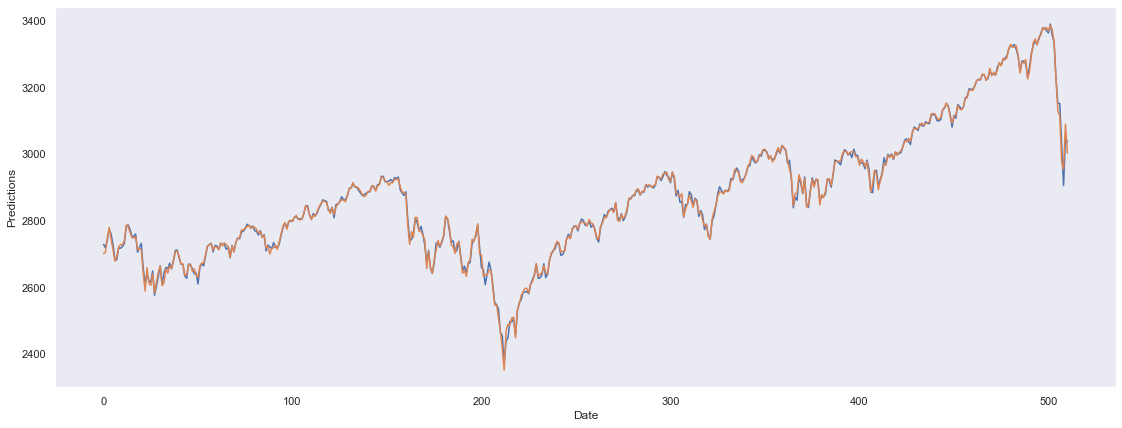

In [123]:
sns.set(style = 'dark')
plt.figure(figsize = [19, 7])
plt.plot(linear_prediction_1)
plt.plot(y_test)
plt.xlabel('Date')
plt.ylabel('Predictions')
plt.show()

In [59]:
#building my own multivariate model

#features
X_train_1 = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)

#output variable - Closing price
y_final = np.zeros((2047,1))
for item in range(len(y_train)):
    y_final[item] = y_train[item]
    
m = len(X_train_1)
X_final = np.hstack((np.ones((len(X_train_1),1)), X_train_1))

#init theta - Gradients - Cofficients
Theta = np.zeros((4,1))
#inherent valiation techniques

#Cost function 
def cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m)*np.sum(np.square(predictions - y_train))
    
    return cost
    
#gradient descent algorithm
def gradient_descent(X,y,theta,alpha=0.01,iterations=500):
    m = len(y)
    
    cost_history = np.zeros((iterations))
    theta_history = np.zeros((iterations,4))
    
    for it in range(iterations):
#         prediction = np.dot(X,theta)
        theta = theta - alpha*(1/m)*(X.T.dot(np.dot(X,theta) - y))
        theta_history[it,:] = theta.T
        cost_history[it:] = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [88]:
lr = 0.01
n_iter = 500

theta,cost_history, theta_history = gradient_descent(X_final,y_final,Theta,lr,n_iter)

<function matplotlib.pyplot.show(*args, **kw)>

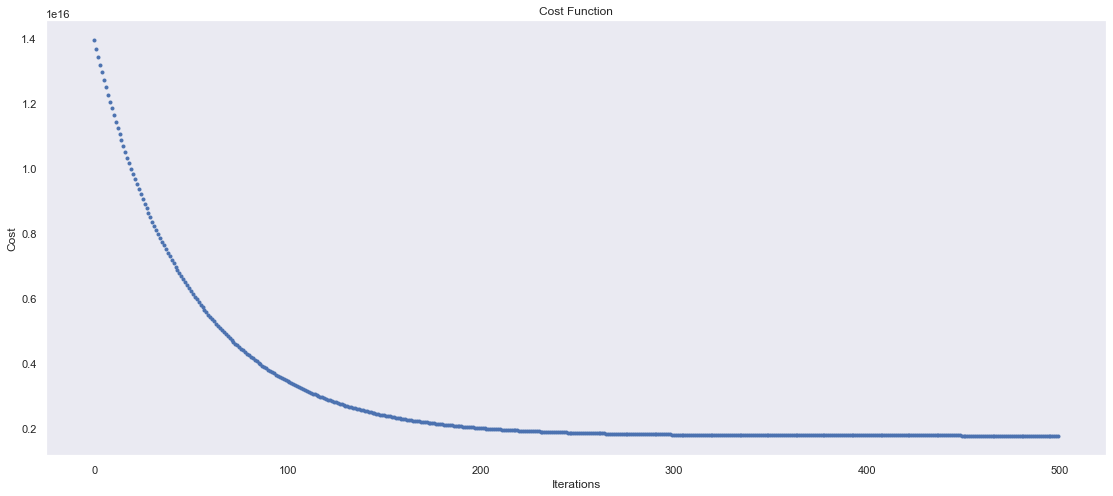

In [122]:
cost_history.shape
plt.figure(figsize=[19,8])
plt.plot(cost_history,'b.')
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show

In [93]:
X_test_norm = (X_test - X_train.mean())/X_train.std()
X_test_norm = np.c_[np.ones((len(X_test_norm),1)),X_test_norm]
linear_prediction_2 = X_test_norm.dot(theta)

multivar_reg_mse = mean_squared_error(y_test, linear_prediction_2)
print('MSE:', format(linear_reg_mse,'.3f'))

MSE: 372.121


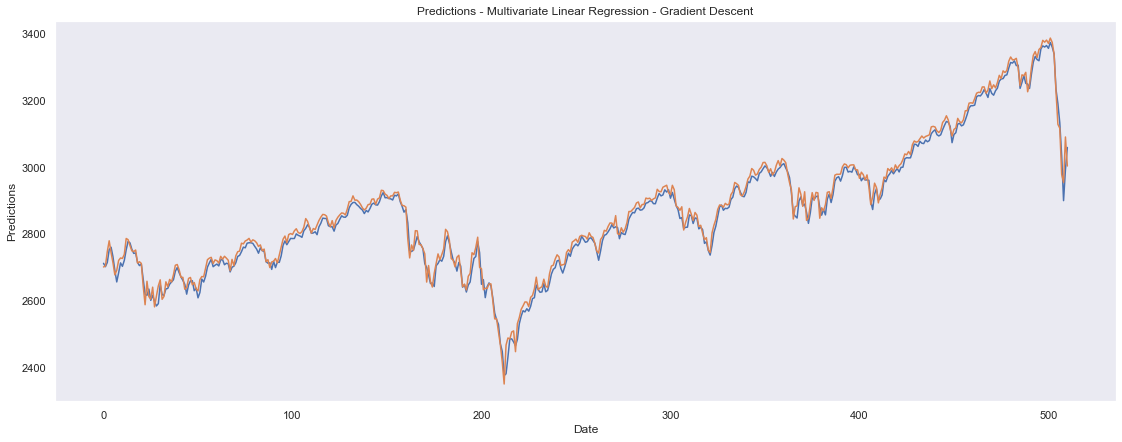

In [121]:
sns.set(style = 'dark')
plt.figure(figsize = [19, 7])
plt.plot(linear_prediction_2)
plt.plot(y_test)
plt.xlabel('Date')
plt.ylabel('Predictions')
plt.title('Predictions - Multivariate Linear Regression - Gradient Descent')
plt.show()

In [64]:
#Normal equations
X_b = np.c_[np.ones((len(X_train),1)),X_train]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_final)
# linear_prediction_3 = X_test.dot(theta_best)
X_trial = np.c_[np.ones((len(X_test),1)),X_test]
linear_prediction_3 = X_trial.dot(theta_best)

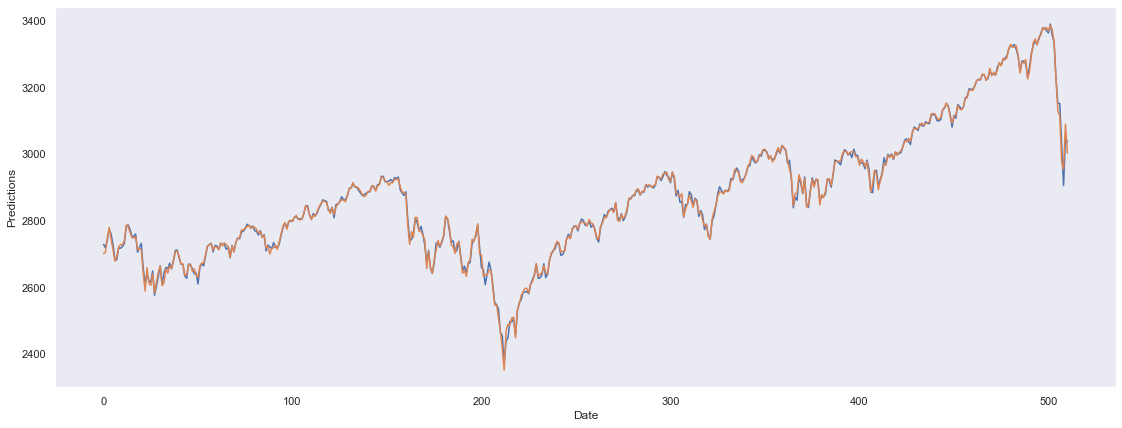

In [125]:
sns.set(style = 'dark')
plt.figure(figsize = [19, 7])
plt.plot(linear_prediction_3)
plt.plot(y_test)
plt.xlabel('Date')
plt.ylabel('Predictions')
plt.show()

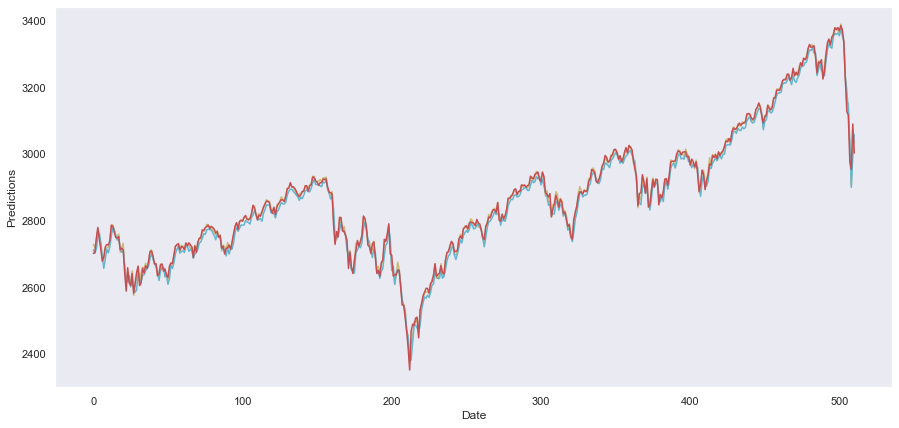

In [107]:
#plotting all predictions
sns.set(style = 'dark')
plt.figure(figsize = [15, 7])
plt.plot(linear_prediction_1,'y')
plt.plot(linear_prediction_2,'c')
# plt.plot(linear_prediction_3,'c')
plt.plot(y_test,'r')
plt.xlabel('Date')
plt.ylabel('Predictions')
plt.show()

In [141]:
X_today = np.array([[3045.75, 3130.97,3034.38]])
X_today.shape

(1, 3)

In [142]:
X_today = (X_today - X_train.mean())/X_train.std()
X_today = np.c_[np.ones((len(X_today),1)),X_today]
X_today

array([[1.        , 2.82881076, 3.01657474, 2.80375941]])

In [143]:
X_today.dot(theta)

array([[3059.32026413]])

In [140]:
theta

array([[1751.02354433],
       [ 150.82355955],
       [ 151.40202228],
       [ 151.5571891 ]])